In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
!pip install tensorflow==2.10.1 # Install an older version of tensorflow

In [ ]:
import os
import numpy as np
from numpy.linalg import norm
import PIL
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B3
import tensorflow.keras.applications.efficientnet_v2 as efficientnet_v2
import math
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
img_size =224
batch_size = 16

# change the next paths according to your directory structure

data_dir = '/content/drive/MyDrive/Ml projects/Sketch_retrieval/dataset_mine/Img-out-container/updated_categories' # data path
model_path = '/content/drive/MyDrive/Ml projects/Sketch_retrieval/efficientnet_model' # model path
features_path = '/content/drive/MyDrive/Ml projects/Sketch_retrieval/feature_list.npy' # features path

In [ ]:
def similar_images(indices, filenames):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,5,plotnumber)
            print(filenames[index])
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')
            plotnumber+=1
    plt.tight_layout()



def retrieve_similar_images(img_path, model, feature_list, filenames):
    file_paths = [os.path.join(data_dir, file_name) for file_name in filenames]
    # read and preprocess the image
    input_shape = (img_size, img_size, 3)
    img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)

    preprocessed_img = efficientnet_v2.preprocess_input(expanded_img_array)

    neighbors = NearestNeighbors(n_neighbors=10,
                             algorithm='ball_tree',
                             metric='euclidean')
    neighbors.fit(feature_list)

    # predict the features of the using the resnet model
    test_img_features = model.predict(preprocessed_img, batch_size=1)

    # get the most similar images indices using KNN
    _, indices = neighbors.kneighbors(test_img_features)

    # print the original image and the 10 most similar images
    plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
    plt.xlabel('Original Image',fontsize=20)
    plt.show()
    print('********* Predictions ***********')
    similar_images(indices[0], file_paths)

    return

In [ ]:
efficientnet_model = load_model(model_path)

In [ ]:
efficientnet_datagen =  ImageDataGenerator(preprocessing_function=efficientnet_v2.preprocess_input)
efficientnet_generator = efficientnet_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    class_mode=None,
    shuffle=False) # set as validation data

Found 3341 images belonging to 12 classes.


In [ ]:
feature_extractor = efficientnet_model.layers[0]

In [ ]:
# run the next cells if there is more images added to the data, remember to change feature_list.npy to a new directory when running for new data.

# efficientnet_feature_list = feature_extractor.predict(efficientnet_generator)
# np.save('/content/drive/MyDrive/Ml projects/Sketch_retrieval/feature_list.npy', efficientnet_feature_list)

In [ ]:
feature_list = np.load(features_path)

1/1 [==============================] - 0s 177ms/step


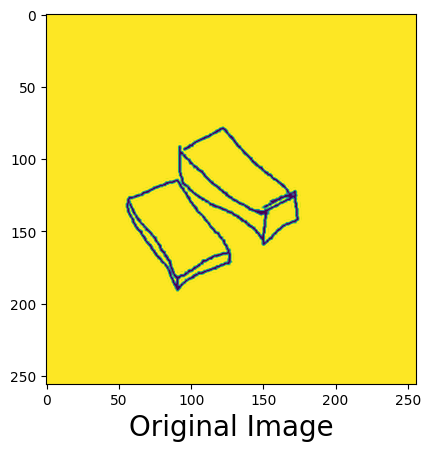

********* Predictions ***********
/content/drive/MyDrive/Ml projects/Sketch_retrieval/dataset_mine/Img-out-container/updated_categories/1-3_Conjoined 3D Rectangles/train_fullStroke_1071.png
/content/drive/MyDrive/Ml projects/Sketch_retrieval/dataset_mine/Img-out-container/updated_categories/2-1_Cube/train_fullStroke_831.png
/content/drive/MyDrive/Ml projects/Sketch_retrieval/dataset_mine/Img-out-container/updated_categories/1-3_Conjoined 3D Rectangles/train_fullStroke_2553.png
/content/drive/MyDrive/Ml projects/Sketch_retrieval/dataset_mine/Img-out-container/updated_categories/2-1_Cube/train_fullStroke_2994.png
/content/drive/MyDrive/Ml projects/Sketch_retrieval/dataset_mine/Img-out-container/updated_categories/4-1_Prism  Form/train_fullStroke_4768.png
/content/drive/MyDrive/Ml projects/Sketch_retrieval/dataset_mine/Img-out-container/updated_categories/1-3_Conjoined 3D Rectangles/train_fullStroke_114.png
/content/drive/MyDrive/Ml projects/Sketch_retrieval/dataset_mine/Img-out-container

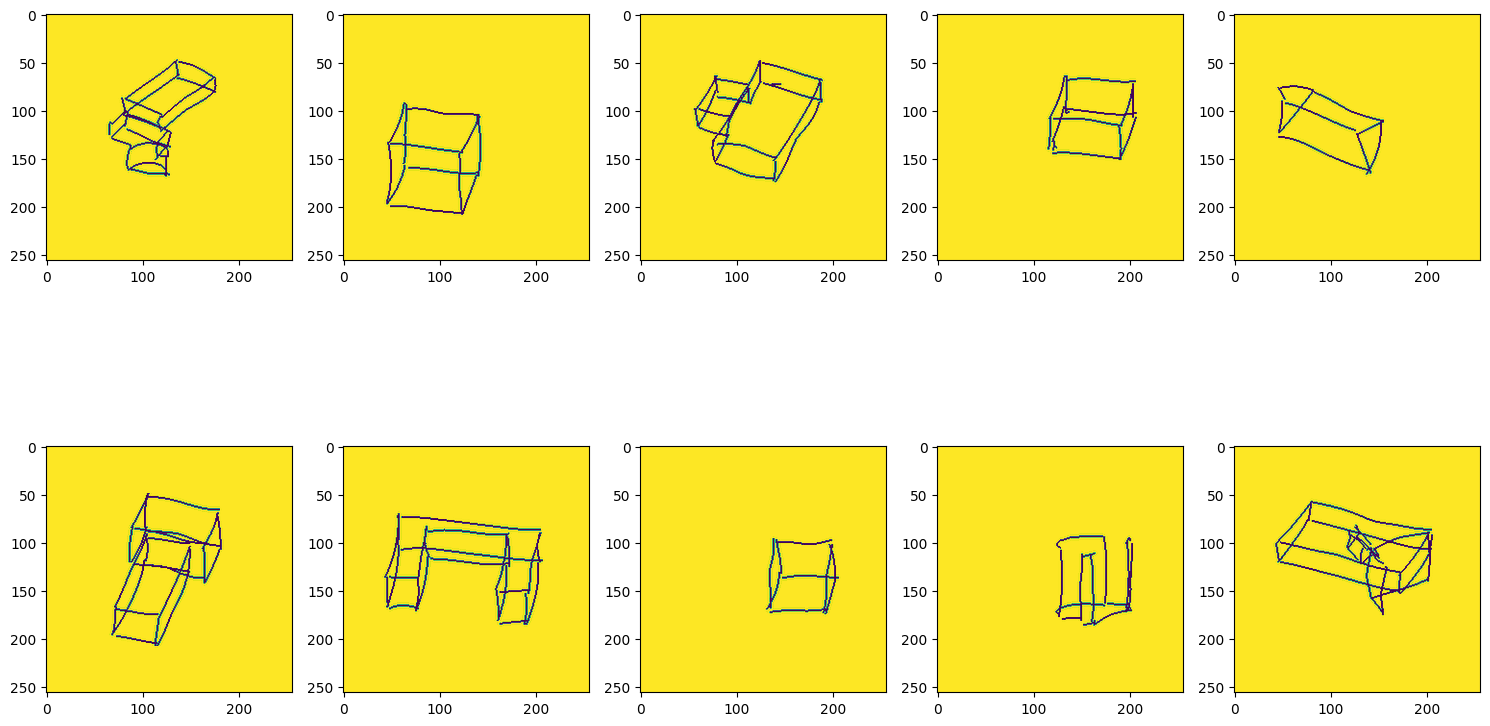

In [ ]:
test_image = '/content/drive/MyDrive/Ml projects/Sketch_retrieval/dataset_mine/testing_samples/5-2.png'

retrieve_similar_images(test_image, feature_extractor, feature_list, efficientnet_generator.filenames)